In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/europarl-v10.ro-en.tsv',  sep = '\t', on_bad_lines='skip')

<ipython-input-3-6e39a7e747c6>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/europarl-v10.ro-en.tsv',  sep = '\t', on_bad_lines='skip')


In [4]:
df1.head(10)

,4.,4..1,ep-09-11-26-008-04.txt,008-04,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Ratificarea şi punerea în aplicare a convenţii...,The ratification and implementation of the upd...,ep-09-11-26-008-04.txt,008-04,NaN,NaN,NaN,NaN
1,Continuări ale rezoluţiilor Parlamentului: con...,Action taken on Parliament's resolutions: see ...,ep-09-05-04-010.txt,010,NaN,NaN,NaN,NaN
2,Acordurile bilaterale între statele membre și ...,Bilateral agreements between Member States and...,ep-09-05-06-013.txt,013,NaN,NaN,NaN,NaN
3,Următorul punct este dezbaterea comună privind,The next item is the joint debate on,ep-09-05-06-013.txt,013,352,Preşedintele,NaN,NaN
4,"raportul dlui Tadeusz Zwiefka, în numele Comis...","the report by Tadeusz Zwiefka, on behalf of th...",ep-09-05-06-013.txt,013,352,Preşedintele,NaN,NaN
5,"raportul dlui Gérard Deprez, în numele Comisie...","the report by Gérard Deprez, on behalf of the ...",ep-09-05-06-013.txt,013,352,Preşedintele,NaN,NaN
6,"raportul dnei Maria Grazia Pagano, în numele C...","the report by Maria Grazia Pagano, on behalf o...",ep-09-05-06-013.txt,013,352,Preşedintele,NaN,NaN
7,"Domnule preşedinte, domnule comisar, mai întâi...","Mr President, Commissioner, firstly I would li...",ep-09-05-06-013.txt,013,353,Tadeusz Zwiefka,PL,NaN
8,În ciuda poziţiilor noastre de negociere iniţi...,In spite of our fairly distant initial negotia...,ep-09-05-06-013.txt,013,353,Tadeusz Zwiefka,PL,NaN
9,Propunerea de regulament stabileşte un mecanis...,The proposal for a regulation establishes a me...,ep-09-05-06-013.txt,013,353,Tadeusz Zwiefka,PL,NaN


In [5]:
df1.isnull().sum()

4.                            79
4..1                          47
ep-09-11-26-008-04.txt         0
008-04                         0
Unnamed: 4                 10744
Unnamed: 5                 10746
Unnamed: 6                248566
Unnamed: 7                230063
dtype: int64

In [6]:
df1.rename(columns={'4.': 'Romanian', '4..1': 'english'}, inplace=True)

In [7]:
df1.columns

Index(['Romanian', 'english', 'ep-09-11-26-008-04.txt', '008-04', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [8]:
data = df1[['Romanian','english']]

In [9]:
data.head()

,Romanian,english
0,Ratificarea şi punerea în aplicare a convenţii...,The ratification and implementation of the upd...
1,Continuări ale rezoluţiilor Parlamentului: con...,Action taken on Parliament's resolutions: see ...
2,Acordurile bilaterale între statele membre și ...,Bilateral agreements between Member States and...
3,Următorul punct este dezbaterea comună privind,The next item is the joint debate on
4,"raportul dlui Tadeusz Zwiefka, în numele Comis...","the report by Tadeusz Zwiefka, on behalf of th..."


In [10]:
data = data.dropna()
data.isnull().sum()

Romanian    0
english     0
dtype: int64

In [11]:
data.shape

(392212, 2)

In [14]:
import nltk
import re
from nltk.tokenize import word_tokenize
import spacy

In [15]:
def contains_alphabetic(text):
    return bool(re.search(r'[a-zA-Z]', text))

def filter_df_by_alphabetic(df, column_name):
    return df[df[column_name].apply(contains_alphabetic)]

data = filter_df_by_alphabetic(data, 'Romanian')
data = filter_df_by_alphabetic(data, 'english')

In [16]:
data = data.reset_index(drop=True)


In [17]:
data.head()

,Romanian,english
0,Ratificarea şi punerea în aplicare a convenţii...,The ratification and implementation of the upd...
1,Continuări ale rezoluţiilor Parlamentului: con...,Action taken on Parliament's resolutions: see ...
2,Acordurile bilaterale între statele membre și ...,Bilateral agreements between Member States and...
3,Următorul punct este dezbaterea comună privind,The next item is the joint debate on
4,"raportul dlui Tadeusz Zwiefka, în numele Comis...","the report by Tadeusz Zwiefka, on behalf of th..."


In [18]:
data.index

RangeIndex(start=0, stop=49421, step=1)

In [19]:
type(data['english'][0])

str

In [20]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(data, test_size=0.2, random_state=42)

In [21]:
type(data['english'][0])

str

In [22]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("BlackKakapo/opus-mt-ro-en")
model = AutoModelForSeq2SeqLM.from_pretrained("BlackKakapo/opus-mt-ro-en")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/800k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/779k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/310M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

In [24]:
import torch

In [25]:
input_text = "Ce faci?"

inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True).to('cpu')

with torch.no_grad():
    outputs = model.generate(**inputs)

translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(f"Original text: {input_text}")
print(f"Translated text: {translated_text}")

Original text: Ce faci?
Translated text: What are you doing?


In [26]:
def tokenize_row(row):
    inputs = tokenizer(row['Romanian'], max_length=128, truncation=True, padding="max_length")
    with tokenizer.as_target_tokenizer():
        targets = tokenizer(row['english'], max_length=128, truncation=True, padding="max_length")

    inputs['labels'] = targets['input_ids']
    return inputs

tokenized_data = data.apply(tokenize_row, axis=1).apply(pd.Series)

import torch

def convert_to_torch_dataset(df):
    input_ids = torch.tensor(df['input_ids'].tolist())
    attention_mask = torch.tensor(df['attention_mask'].tolist())
    labels = torch.tensor(df['labels'].tolist())

    dataset = torch.utils.data.TensorDataset(input_ids, attention_mask, labels)
    return dataset

torch_dataset = convert_to_torch_dataset(tokenized_data)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4016: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [28]:
X_train_tkn = tokenizer(train['Romanian'].tolist(),max_length=180, padding=True, truncation=True, return_tensors="pt")
X_val_tkn = tokenizer(val['Romanian'].tolist(),max_length=180, padding=True, truncation=True, return_tensors="pt")

In [29]:
with tokenizer.as_target_tokenizer():
        y_train_tkn = tokenizer(train['english'].tolist(), max_length=180, padding=True, truncation=True, return_tensors="pt")
        y_val_tkn = tokenizer(val['english'].tolist(), max_length=180, padding=True, truncation=True, return_tensors="pt")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4016: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [30]:
X_train = X_train_tkn['input_ids']
X_train_mask = X_train_tkn['attention_mask']
y_train=y_train_tkn['input_ids']
y_train_mask = y_train_tkn['attention_mask']
X_val = X_val_tkn['input_ids']
X_val_mask = X_val_tkn['attention_mask']
y_val=y_val_tkn['input_ids']
y_val_mask = y_val_tkn['attention_mask']

In [31]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch.optim as optim

batch_size = 16

train_dataset = TensorDataset(X_train, X_train_mask, y_train, y_train_mask)
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)

val_dataset = TensorDataset(X_val, X_val_mask, y_val, y_val_mask)
val_dataloader = DataLoader(val_dataset, sampler=RandomSampler(val_dataset), batch_size=batch_size)

In [32]:
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [33]:
encoder = len(model.model.encoder.layers)
decoder = len(model.model.decoder.layers)

In [34]:
# Freeze encoder layers
for i in range(5):
    for param in model.model.encoder.layers[i].parameters():
        param.requires_grad = False

# Freeze decoder layers
for i in range(5):
    for param in model.model.decoder.layers[i].parameters():
        param.requires_grad = False

In [36]:
import numpy as np

model.train()
model = model.to(device)
epochs=[]
loss_values=[]
for epoch in range(5):
    total_loss=0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels, b_label_mask  = batch
        optimizer.zero_grad()

        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_epoch_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_epoch_loss)
    print(f'Epoch {epoch + 1}, Loss: {avg_epoch_loss:.4f}')

Epoch 1, Loss: 0.2536
Epoch 2, Loss: 0.1389
Epoch 3, Loss: 0.1312
Epoch 4, Loss: 0.1247
Epoch 5, Loss: 0.1191


In [37]:
torch.save(model.state_dict(), 'ro_en_weights.pth')

In [38]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import os

In [39]:
val.head()

,Romanian,english
42872,Îmi voi îndrepta acum atenţia asupra raportulu...,I will turn now to Mr von Wogau's report.
3780,"Acesta se va aplica într-o mare măsură, bineîn...",This will apply to a particularly large extent...
1536,"- Vă mulţumesc, dle preşedinte în exerciţiu al...","- Thank you, Mr President-in-Office of the Eur..."
13670,Nu consideraţi că folosirea unui criteriu isto...,Do you not think that using an historical fact...
34736,Fermierii vor rămâne pe drumuri.,It will put farmers out of business.


In [40]:
val_dataloader

In [41]:
val.shape

(9885, 2)

In [42]:
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

def validate_model(model, validation_dataloader, device):
    model.to(device)  
    model.eval()
    total_val_loss = 0
    references = []
    hypotheses = []
    smoothie = SmoothingFunction().method4  

    with torch.no_grad():
        for step, batch in enumerate(validation_dataloader):
            batch = tuple(t.to(device) for t in batch)  
            b_input_ids, b_input_mask, b_labels, b_label_mask = batch

            outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask, labels=b_labels)
            loss = outputs.loss
            total_val_loss += loss.item()

            try:
                generated_ids = model.to('cpu').generate(
                    input_ids=b_input_ids.to('cpu'),
                    attention_mask=b_input_mask.to('cpu'),
                    max_length=128, 
                    num_beams=2,
                    early_stopping=True
                )
                model.to(device) 
            except NotImplementedError as e:
                print(f"Error during generation: {e}")
                continue

            for i in range(len(generated_ids)):
                pred_sentence = generated_ids[i].tolist()
                true_sentence = b_labels[i][b_label_mask[i] == 1].tolist()

                hypotheses.append(pred_sentence)
                references.append([true_sentence])

    avg_val_loss = total_val_loss / len(validation_dataloader)
    print(f'Validation Loss: {avg_val_loss:.4f}')

    # Calculate BLEU score
    bleu_score = np.mean([
        sentence_bleu(ref, hyp, smoothing_function=smoothie)
        for ref, hyp in zip(references, hypotheses)
    ])
    print(f'BLEU Score: {bleu_score:.4f}')

    return avg_val_loss, bleu_score


device = torch.device("mps" if torch.has_mps else "cpu")

validation_loss, bleu_score = validate_model(model, val_dataloader, device)

<ipython-input-42-de061b8291e1>:57: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  device = torch.device("mps" if torch.has_mps else "cpu")


Validation Loss: 1.5547
BLEU Score: 0.0511


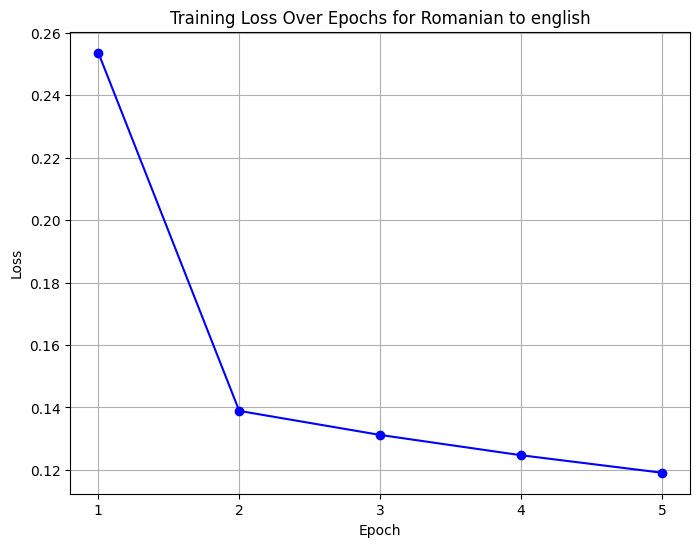

In [1]:
import matplotlib.pyplot as plt

# Data
epochs = [1, 2, 3, 4, 5]
loss = [0.2536, 0.1389, 0.1312, 0.1247, 0.1191]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', color='b')
plt.title('Training Loss Over Epochs for Romanian to english')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.xticks(epochs)  
plt.show()